## Advanced Lane Finding

The goal of this project is to write a software pipeline to identify the lane boundaries in a video from a front-facing camera on a car.

### The algorithm

The steps of this project are the following:

* Compute the camera calibration matrix and distortion coefficients given a set of chessboard images.
* Apply a distortion correction to raw images.
* Use color transforms, gradients, etc., to create a thresholded binary image.
* Apply a perspective transform to rectify binary image ("birds-eye view").
* Detect lane pixels and fit to find the lane boundary.
* Determine the curvature of the lane and vehicle position with respect to center.
* Warp the detected lane boundaries back onto the original image.
* Output visual display of the lane boundaries and numerical estimation of lane curvature and vehicle position.

### Import Packages

In [4]:
from experiments import *
from IPython.display import HTML
%matplotlib inline

### Compute the camera calibration matrix and distortion coefficients given a set of chessboard images.

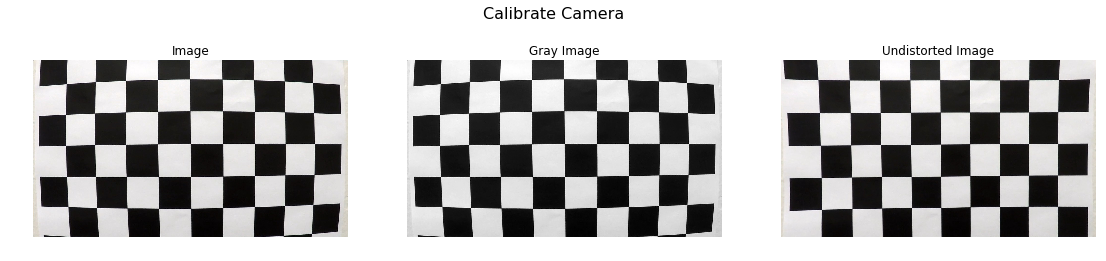

In [5]:
cal_fnames = [path for path in glob.iglob('camera_cal/*.jpg', recursive=True)]
cal_images, cal_gray_images = read_images(cal_fnames)
objpoints, imgpoints, cal_upd_images = get_chessboard_corners(cal_images, cal_gray_images)

cal_selected_idx = 0
cal_test_image = cal_images[cal_selected_idx]
cal_test_image_gray = cal_gray_images[cal_selected_idx]

cal_undistorted_image = correct_distortion(cal_test_image, objpoints, imgpoints)

images_to_show = [cal_test_image, cal_test_image_gray, cal_undistorted_image]
labels_to_show = ["Image", "Gray Image", "Undistorted Image"]
show_images(images_to_show, labels_to_show, cols=len(images_to_show), title="Calibrate Camera")

### Apply a distortion correction to raw images

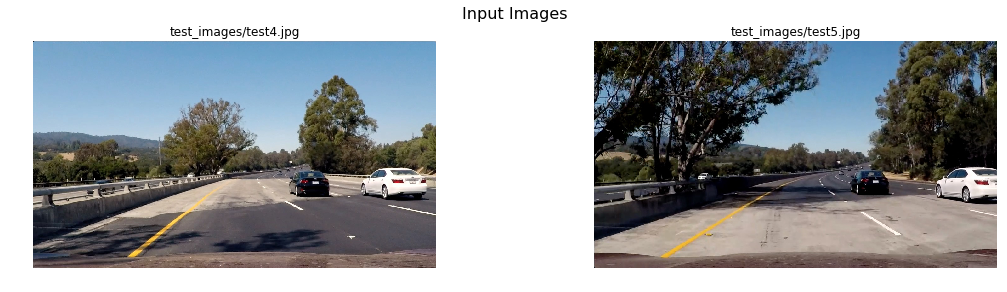

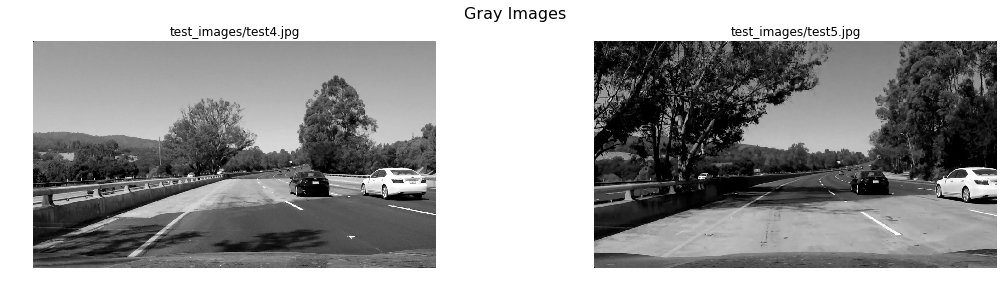

In [7]:
example_fnames = ["test_images/test4.jpg", "test_images/test5.jpg"]
example_images, example_gray_images = read_images(example_fnames)

show_images(example_images, labels=example_fnames, cols=len(example_images), title="Input Images")
show_images(example_gray_images, labels=example_fnames, cols=len(example_gray_images),
            title="Gray Images")

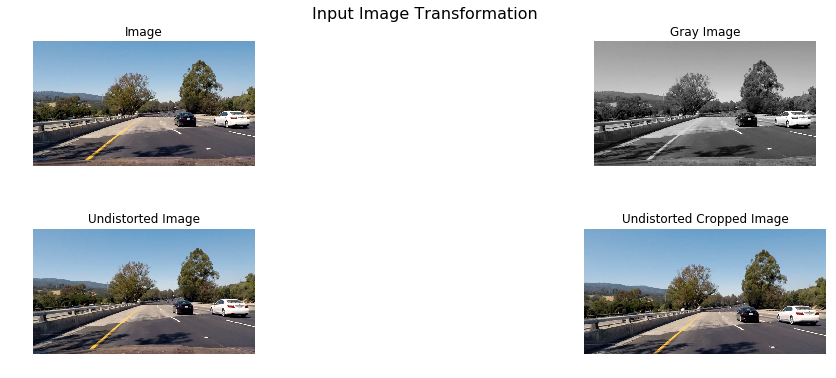

In [8]:
example_selected_idx = 0
example_test_image = example_images[example_selected_idx]
example_test_image_gray = example_gray_images[example_selected_idx]

example_undistorted_image = correct_distortion(example_test_image, objpoints, imgpoints)

example_cropped_undistorted_image = apply_crop_bottom(example_undistorted_image)

images_to_show = [example_test_image, example_test_image_gray, example_undistorted_image,
                  example_cropped_undistorted_image]
labels_to_show = ["Image", "Gray Image", "Undistorted Image", "Undistorted Cropped Image"]
show_images(images_to_show, labels=labels_to_show, cols=len(images_to_show) // 2,
            title="Input Image Transformation")